In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def cal_cost(theta,X,Y):
    '''
    Calculates the cost for given X and y
      theta = vector of thetas
      X = Matrix of X's with shape (m, n+1)
      y = Vector of y's with shape (m, 1)
    
      where
        m is the number of observations
        n is the number of features/input variables
    '''

    m=len(y)
    predictions=X.dot(theta)
    cost=(1/(2*m))*np.sum(np.square(predictions-y))

    return cost

In [4]:
# # Define the input matrix X (3 examples, 2 features including bias)
# X = np.array([
#     [1, 2],
#     [1, 3],
#     [1, 4]
# ])

# # Define the parameter vector theta
# theta = np.array([0.5, 1.0])

# # Perform the dot product
# result = np.dot(X, theta)

# # Print the result
# result


In [21]:
def sgd(X,y,theta,learning_rate=0.01,epochs=10):
    

    m=len(y)
    cost_history=np.zeros(epochs*m)
    theta_history=np.zeros((epochs*m,theta.shape[0]))

    for epoch in range(epochs):
        for i in range(m):

            rand_index=np.random.randint(0,m)
            X_i=X[rand_index,:].reshape(1,X.shape[1])
            y_i=y[rand_index,:].reshape(1,1)

            prediction=X_i.dot(theta)
            theta=theta-learning_rate*(X_i.T.dot(prediction-y_i))

            cost = cal_cost(theta, X, y)
            theta_history[epoch*m+i, :] = theta.T #2Parameters
            cost_history[epoch*m+i] = cost # uni-dimension

    return theta,cost_history,theta_history





In [22]:
X = 2*np.random.rand(100,1) #random 100 data point

In [23]:
y = 4 + 2*X+ np.random.randn(100,1)

In [24]:
### Initialize theta
theta = np.random.randn(2,1)
print(theta)
### Add the bias term (one column) to the feature matrix X
X_b = np.c_[np.ones((len(X),1)),X] # concatenation

[[ 0.24033505]
 [-0.08001027]]


In [25]:
X_b

array([[1.        , 1.9230274 ],
       [1.        , 0.33813308],
       [1.        , 1.06886511],
       [1.        , 0.51079518],
       [1.        , 0.51110094],
       [1.        , 0.42546095],
       [1.        , 0.60145157],
       [1.        , 1.34868678],
       [1.        , 1.11363832],
       [1.        , 0.48098157],
       [1.        , 1.55257449],
       [1.        , 0.03135696],
       [1.        , 0.30599712],
       [1.        , 1.7299422 ],
       [1.        , 1.3077111 ],
       [1.        , 0.68615354],
       [1.        , 1.82110671],
       [1.        , 0.35326658],
       [1.        , 1.33088051],
       [1.        , 0.75806419],
       [1.        , 0.81895043],
       [1.        , 0.72000511],
       [1.        , 0.64553383],
       [1.        , 1.21851021],
       [1.        , 1.77572694],
       [1.        , 0.17122781],
       [1.        , 1.5035625 ],
       [1.        , 0.33856896],
       [1.        , 0.23753267],
       [1.        , 0.1378673 ],
       [1.

In [26]:
theta_sgd, cost_history_sgd, theta_history_sgd = sgd(X_b, y, theta,epochs=10)

Text(0.5, 0.5, 'Final Cost: 0.437\nTheta0: 3.623\nTheta1: 2.253')

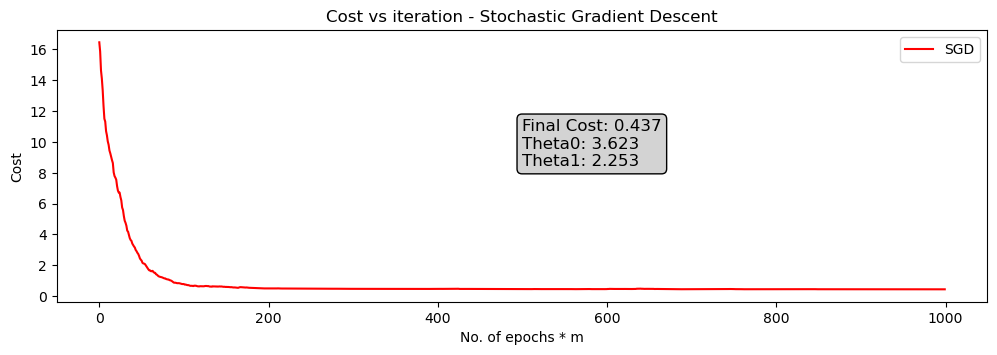

In [27]:
# Plotting cost history in separate subplots under the same chart
plt.figure(figsize=(12,12)) #canvas ready

# Plot for SGD
plt.subplot(3,1,1)
plt.plot(range(len(cost_history_sgd)), cost_history_sgd, label='SGD', color='red')
plt.title('Cost vs iteration - Stochastic Gradient Descent')
plt.xlabel('No. of epochs * m')
plt.ylabel('Cost')
plt.legend()
plt.annotate(f'Final Cost: {cost_history_sgd[-1]:.3f}\nTheta0: {theta_sgd[0][0]:.3f}\nTheta1: {theta_sgd[1][0]:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)
